Lab 1, Aleksandr Berezutskii, group 4, Skoltech 2018

Let us first import libraries that we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we need to import data provided from Canvas

In [2]:
data_group4 = np.array(np.loadtxt(r"C:\Users\Aleksandr\Desktop\Skoltech\Experimental data processing\Lab_1\Data_Text\data_group4.txt"))

Let's check what we have imported. The format is as follows: year, month, monthly solar radio flux at 10.7 cm, monthly sunspot number

In [3]:
data_group4

array([[ 1964. ,     4. ,    72.6,    12.9],
       [ 1964. ,     5. ,    69.5,    14.3],
       [ 1964. ,     6. ,    69. ,    13.5],
       ..., 
       [ 1997. ,     4. ,    74.5,    23. ],
       [ 1997. ,     5. ,    74.6,    25.4],
       [ 1997. ,     6. ,    71.7,    20.8]])

Before we start plotting it is convenient to extract each of 4 arrays of data

In [4]:
#year
year=[]
for i in range(len(data_group4)):
    year=np.append(year, data_group4[i,0])

In [5]:
#month
month=[]
for i in range(len(data_group4)):
    month=np.append(month, data_group4[i,1])

In [6]:
#monthly solar radio flux at 10.7 cm
flux=[]
for i in range(len(data_group4)):
    flux=np.append(flux, data_group4[i,2])

In [7]:
#monthly sunspot number
ssnumber=[]
for i in range(len(data_group4)):
    ssnumber=np.append(ssnumber, data_group4[i,3])

Now let us start plotting

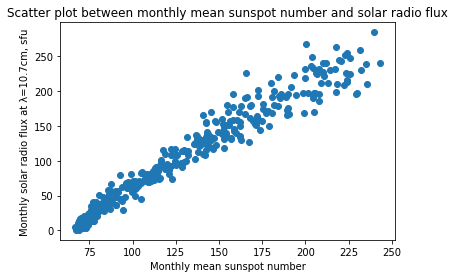

In [8]:
plt.plot(flux, ssnumber, 'o', label='data')
plt.title('Scatter plot between monthly mean sunspot number and solar radio flux')
plt.ylabel('Monthly solar radio flux at λ=10.7cm, sfu')
plt.xlabel('Monthly mean sunspot number')
plt.show()

It can be clearly seen that the more sunspots are on the sun, the more powerful solar radio flux is

Let us make smoothing of monthly mean sunspot numbers by 13-month running mean and plot results

In [9]:
ssnumbersmooth=[]
for i in range(6,len(ssnumber)-6):
    ssnumbersmooth=np.append(ssnumbersmooth, ssnumber[i-6]/24 + (ssnumber[i-5] + ssnumber[i-4] + ssnumber[i-3] + ssnumber[i-2] + ssnumber[i-1] + ssnumber[i] + ssnumber[i+1] + ssnumber[i+2] + ssnumber[i+3] + ssnumber[i+4] + ssnumber[i+5])/12 + ssnumber[i+6]/24)
for i in range(6):
    ssnumbersmooth=np.append(ssnumbersmooth, ssnumber[i])
    ssnumbersmooth=np.append(ssnumbersmooth, ssnumber[-i])

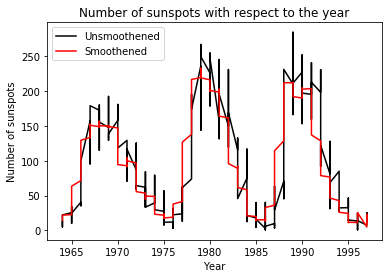

In [10]:
plt.plot(year, ssnumber, '-', color='black', label='unsmoothened')
plt.plot(year, ssnumbersmooth, '-', color='red' ,label='smoothened')
plt.title('Number of sunspots with respect to the year')
plt.ylabel('Number of sunspots')
plt.xlabel('Year')
plt.legend(['Unsmoothened', 'Smoothened'], loc = 'best')
plt.show()

Let us make smoothing of monthly mean flux by 13-month running mean and plot results

In [11]:
fluxsmooth=[]
for i in range(6,len(flux)-6):
    fluxsmooth=np.append(fluxsmooth, flux[i-6]/24 + (flux[i-5] + flux[i-4] + flux[i-3] + flux[i-2] + flux[i-1] + flux[i] + flux[i+1] + flux[i+2] + flux[i+3] + flux[i+4] + flux[i+5])/12 + flux[i+6]/24)
for i in range(6):
    fluxsmooth=np.append(fluxsmooth, flux[i])
    fluxsmooth=np.append(fluxsmooth, flux[-i])

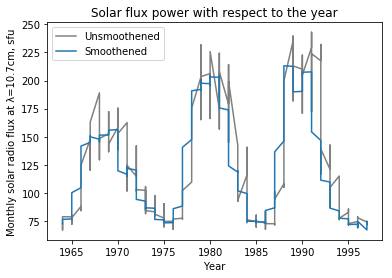

In [12]:
plt.plot(year, flux, '-', color='gray', label='unsmoothened')
plt.plot(year, fluxsmooth, '-', label='smoothened')
plt.title('Solar flux power with respect to the year')
plt.ylabel('Monthly solar radio flux at λ=10.7cm, sfu')
plt.xlabel('Year')
plt.legend(['Unsmoothened', 'Smoothened'], loc = 'best')
plt.show()

Let us now construct multi-dimensional linear regression $F_i = \beta_0 + \beta_1 R_i + \beta_2 R_i^2 + \beta_3 R_i^3 + \epsilon_i$, determining vector of regressands (dependent variable) F, matrix of regressors vector (independent variables) $R$, and vector of coefficients $\beta$, ignoring for now random noise $\epsilon_i$

In [13]:
F=flux
R=np.zeros((len(F),4))
for j in range(4):
    for i in range(len(F)):
        R[i,j] = ssnumbersmooth[i]**j

Let us determine vector of coefficients by Least Squares Method. The vector of coefficients is determined according to the given equation $\beta=(R^TR)^{-1}R^TF$

In [14]:
B=np.matmul(np.linalg.inv(np.matmul(np.transpose(R),R)),np.matmul(np.transpose(R),F))

Let us now reconstruct solar radio flux at 10.7 cm on the basis of sunspot number using $F_i = \beta_0 + \beta_1 R_i + \beta_2 R_i^2 + \beta_3 R_i^3$

In [15]:
fluxnew=[]
for i in range(len(F)):
    fluxnew = np.append(fluxnew, B[0] + B[1]*ssnumbersmooth[i] + B[2]*ssnumbersmooth[i]**2 + B[3]*ssnumbersmooth[i]**3)

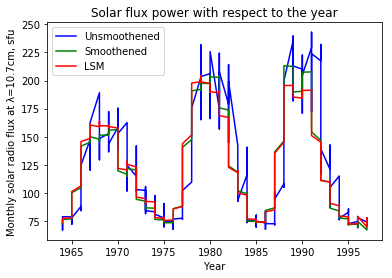

In [16]:
plt.plot(year, flux, '-', color='blue', label='unsmoothened')
plt.plot(year, fluxsmooth, '-', color='green', label='smoothened')
plt.plot(year, fluxnew, '-', color='red', label='lsm')
plt.title('Solar flux power with respect to the year')
plt.ylabel('Monthly solar radio flux at λ=10.7cm, sfu')
plt.xlabel('Year')
plt.legend(['Unsmoothened', 'Smoothened', 'LSM'], loc = 'best')
plt.show()

Determine the variance of estimation error of solar radio flux at 10.7
$$
\sigma^2 = \frac{1}{N-1}\sum_{i=1}^{N} (f_i - \hat{f}_i)^2
$$

In [17]:
sum=0
for i in range(len(F)):
    sum = sum + (fluxnew[i]-fluxsmooth[i])**2

In [18]:
print(sum*(1/(len(F)-1)))

34.0135197876


To summarize everything done in this laboratory practice: I understood the relationship between main
indicators of solar activity, sunspot number and the solar radio flux at 10.7 cm (2800 MHz) by
applying multi-dimensional linear regression technique. This brought a deeper
understanding of the Least-Square method (LSM), acquaintance with main indicators of solar
activity, and more detailed qualitative and quantitative understanding of the important
interactions.